In [42]:
import sys
assert sys.version_info >= (3, 5)

# SCikit Learn >=  0.20 is required.

# Other common imports 
import numpy as np
import os

# To plot pretty figures.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save figures.
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png',resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Clustering

In [43]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


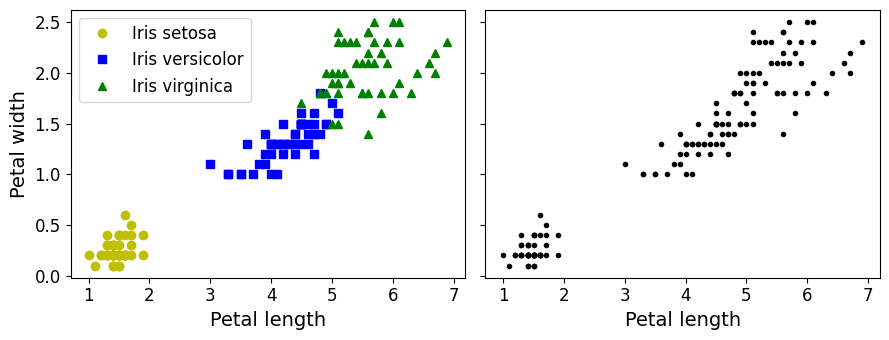

In [44]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()



In [45]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)


In [46]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode_result = stats.mode(y_pred[y==class_id], keepdims=True)
    mode = mode_result.mode[0] 
    mapping[mode] = class_id
print(mapping)


{np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(0): np.int64(2)}


In [47]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

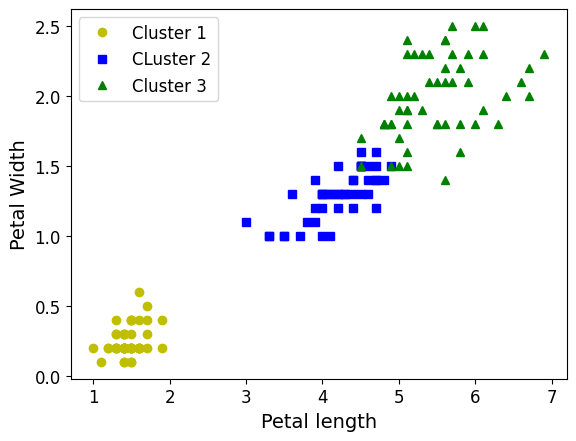

In [48]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="CLuster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [49]:
np.sum(y_pred==y)
np.sum(y_pred==y) / len(y_pred)

np.float64(0.9666666666666667)

K_Means

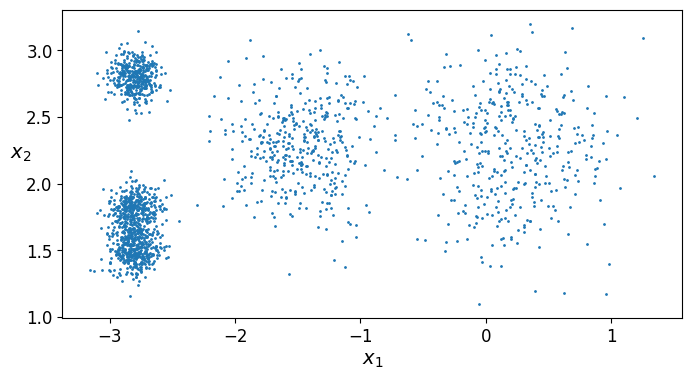

In [50]:
from sklearn.datasets import make_blobs

blob_centers  = np.array(
    [[0.2, 2.3], 
     [-1.5, 2.3], 
     [-2.8, 1.8], 
     [-2.8, 2.8],
     [-2.8, 1.5]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std ,random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

                 



Training K-means clusters on this dataset. It will try to find each blob's center and assign each instance to the closest  blob


In [51]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

print(y_pred)

y_pred is kmeans.labels_

[2 2 4 ... 1 0 2]


True

In [52]:
# this will estimate the 5 centroids
kmeans.cluster_centers_


array([[-0.06064533,  2.25047218],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.65137733],
       [-1.47661091,  2.28302552],
       [ 0.55698583,  2.27001973]])

In [53]:
kmeans.labels_

array([2, 2, 4, ..., 1, 0, 2], shape=(2000,), dtype=int32)

In [57]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

Decision Boundaries --- Plotting the model's decision boundaries


In [54]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_clor='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color,zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_clor, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1 
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  

    plt.contourf(Z,extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors="k")
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)                

    


Saving figure voronio_plot


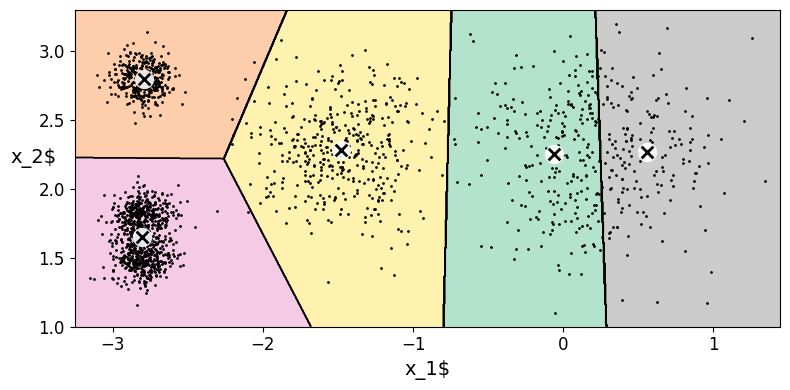

In [55]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronio_plot")
plt.show()

Hard clustering vs soft Clustering.

In [58]:
kmeans.transform(X_new)

array([[0.25770947, 2.9042344 , 2.823744  , 1.50349034, 0.61898616],
       [3.0708771 , 5.84739223, 5.81260477, 4.48554887, 2.45789114],
       [3.03341356, 0.29040966, 1.36305957, 1.68367655, 3.6311182 ],
       [2.94992711, 0.36159148, 0.87138323, 1.53876322, 3.56441287]])

In [59]:
# To verify the above is indeed the Eucleadian distance:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.25770947, 2.9042344 , 2.823744  , 1.50349034, 0.61898616],
       [3.0708771 , 5.84739223, 5.81260477, 4.48554887, 2.45789114],
       [3.03341356, 0.29040966, 1.36305957, 1.68367655, 3.6311182 ],
       [2.94992711, 0.36159148, 0.87138323, 1.53876322, 3.56441287]])